# Feature Engineering & Feature Extraction

## Attaching Resources

### Importing Necessary Libraries

In [164]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (15,8)
plt.rcParams['figure.dpi'] = 250
sns.set_style(style='darkgrid')
plt.tight_layout()
%matplotlib inline

<Figure size 3750x2000 with 0 Axes>

### Adding Dataset

In [165]:
wp = pd.read_csv('https://raw.githubusercontent.com/kunal-mallick/Churn_Prediction/main/resources/Churn.csv', index_col=0)

wp

,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
1,KS,area_code_415,128,yes,25,no,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
2,OH,area_code_415,107,yes,26,no,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
3,NJ,area_code_415,137,no,0,no,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
4,OH,area_code_408,84,no,0,yes,6.6,7,1.78,299.4,71,50.9,61.9,88,5.26,196.9,89,8.86,2,no
5,OK,area_code_415,75,no,0,yes,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,HI,area_code_408,50,yes,40,no,9.9,5,2.67,235.7,127,40.07,223,126,18.96,297.5,116,13.39,2,no
4997,WV,area_code_415,152,no,0,no,14.7,2,3.97,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,3,yes
4998,DC,area_code_415,61,no,0,no,13.6,4,3.67,140.6,89,23.9,172.8,128,14.69,212.4,97,9.56,1,no
4999,DC,area_code_510,109,no,0,no,8.5,6,2.30,188.8,67,32.1,171.7,92,14.59,224.4,89,10.10,0,no


### Converting Categorical Data to Numerical Data

### Performing Data Cleaning

#### day.charge

In [166]:
wp[wp['day.charge'] == 'Nan'].shape

(7, 20)

In [167]:
dc = wp[wp['day.charge'] == 'Nan'].index

len(dc)

7

In [168]:
drop = []

for i in dc:
    drop.append(i)

drop

[13, 28, 48, 4408, 4756, 4966, 4993]

#### eve.mins

In [169]:
wp[wp['eve.mins'] == 'Nan'].shape

(24, 20)

In [170]:
em = wp[wp['eve.mins'] == 'Nan'].index

len(em)

24

In [171]:
for i in em:
    drop.append(i)

#### Droping All Nan Data

In [172]:
sorted(drop)

[13,
 28,
 48,
 90,
 103,
 111,
 160,
 232,
 255,
 300,
 346,
 461,
 558,
 625,
 685,
 730,
 751,
 796,
 893,
 1013,
 1100,
 1220,
 1418,
 1484,
 1626,
 1700,
 1779,
 4408,
 4756,
 4966,
 4993]

In [173]:
wp.drop(drop, inplace = True)

wp

,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
1,KS,area_code_415,128,yes,25,no,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
2,OH,area_code_415,107,yes,26,no,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
3,NJ,area_code_415,137,no,0,no,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
4,OH,area_code_408,84,no,0,yes,6.6,7,1.78,299.4,71,50.9,61.9,88,5.26,196.9,89,8.86,2,no
5,OK,area_code_415,75,no,0,yes,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,HI,area_code_408,50,yes,40,no,9.9,5,2.67,235.7,127,40.07,223,126,18.96,297.5,116,13.39,2,no
4997,WV,area_code_415,152,no,0,no,14.7,2,3.97,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,3,yes
4998,DC,area_code_415,61,no,0,no,13.6,4,3.67,140.6,89,23.9,172.8,128,14.69,212.4,97,9.56,1,no
4999,DC,area_code_510,109,no,0,no,8.5,6,2.30,188.8,67,32.1,171.7,92,14.59,224.4,89,10.10,0,no


In [174]:
wp.reset_index(inplace=True)
wp.drop(columns='index',inplace=True)

wp

,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,KS,area_code_415,128,yes,25,no,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
1,OH,area_code_415,107,yes,26,no,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
2,NJ,area_code_415,137,no,0,no,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
3,OH,area_code_408,84,no,0,yes,6.6,7,1.78,299.4,71,50.9,61.9,88,5.26,196.9,89,8.86,2,no
4,OK,area_code_415,75,no,0,yes,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4964,HI,area_code_408,50,yes,40,no,9.9,5,2.67,235.7,127,40.07,223,126,18.96,297.5,116,13.39,2,no
4965,WV,area_code_415,152,no,0,no,14.7,2,3.97,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,3,yes
4966,DC,area_code_415,61,no,0,no,13.6,4,3.67,140.6,89,23.9,172.8,128,14.69,212.4,97,9.56,1,no
4967,DC,area_code_510,109,no,0,no,8.5,6,2.30,188.8,67,32.1,171.7,92,14.59,224.4,89,10.10,0,no


In [175]:
wp['day.charge'] = wp['day.charge'].apply(lambda x: float(x))
wp['eve.mins'] = wp['eve.mins'].apply(lambda x: float(x))

wp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4969 entries, 0 to 4968
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           4969 non-null   object 
 1   area.code       4969 non-null   object 
 2   account.length  4969 non-null   int64  
 3   voice.plan      4969 non-null   object 
 4   voice.messages  4969 non-null   int64  
 5   intl.plan       4969 non-null   object 
 6   intl.mins       4969 non-null   float64
 7   intl.calls      4969 non-null   int64  
 8   intl.charge     4969 non-null   float64
 9   day.mins        4969 non-null   float64
 10  day.calls       4969 non-null   int64  
 11  day.charge      4969 non-null   float64
 12  eve.mins        4969 non-null   float64
 13  eve.calls       4969 non-null   int64  
 14  eve.charge      4969 non-null   float64
 15  night.mins      4969 non-null   float64
 16  night.calls     4969 non-null   int64  
 17  night.charge    4969 non-null   f

In [176]:
le = LabelEncoder()

In [177]:
wp['state'] = le.fit_transform(wp['state'])
wp['area.code'] = le.fit_transform(wp['area.code'])
wp['voice.plan'] = le.fit_transform(wp['voice.plan'])
wp['intl.plan'] = le.fit_transform(wp['intl.plan'])
wp['churn'] = le.fit_transform(wp['churn'])

wp

,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,16,1,128,1,25,0,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,0
1,35,1,107,1,26,0,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,0
2,31,1,137,0,0,0,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,0
3,35,0,84,0,0,1,6.6,7,1.78,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,2,0
4,36,1,75,0,0,1,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4964,11,0,50,1,40,0,9.9,5,2.67,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,2,0
4965,49,1,152,0,0,0,14.7,2,3.97,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,3,1
4966,7,1,61,0,0,0,13.6,4,3.67,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,1,0
4967,7,2,109,0,0,0,8.5,6,2.30,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,0,0


In [178]:
wp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4969 entries, 0 to 4968
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           4969 non-null   int32  
 1   area.code       4969 non-null   int32  
 2   account.length  4969 non-null   int64  
 3   voice.plan      4969 non-null   int32  
 4   voice.messages  4969 non-null   int64  
 5   intl.plan       4969 non-null   int32  
 6   intl.mins       4969 non-null   float64
 7   intl.calls      4969 non-null   int64  
 8   intl.charge     4969 non-null   float64
 9   day.mins        4969 non-null   float64
 10  day.calls       4969 non-null   int64  
 11  day.charge      4969 non-null   float64
 12  eve.mins        4969 non-null   float64
 13  eve.calls       4969 non-null   int64  
 14  eve.charge      4969 non-null   float64
 15  night.mins      4969 non-null   float64
 16  night.calls     4969 non-null   int64  
 17  night.charge    4969 non-null   f

## Splitting The Data Into Target and Independent set

In [179]:
x = wp.iloc[:,:-1]
y = wp.iloc[:,-1]

In [180]:
x

,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls
0,16,1,128,1,25,0,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1
1,35,1,107,1,26,0,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1
2,31,1,137,0,0,0,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0
3,35,0,84,0,0,1,6.6,7,1.78,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,2
4,36,1,75,0,0,1,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4964,11,0,50,1,40,0,9.9,5,2.67,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,2
4965,49,1,152,0,0,0,14.7,2,3.97,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,3
4966,7,1,61,0,0,0,13.6,4,3.67,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,1
4967,7,2,109,0,0,0,8.5,6,2.30,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,0


In [181]:
y

0       0
1       0
2       0
3       0
4       0
       ..
4964    0
4965    1
4966    0
4967    0
4968    0
Name: churn, Length: 4969, dtype: int32

## Performing Feature Selection

### Performing Univariate Selection

In [182]:
test = SelectKBest(score_func=chi2, k=5)
test.fit(x,y)

SelectKBest(k=5, score_func=<function chi2 at 0x000001F23718AD40>)

In [183]:
test.scores_

array([1.95045137e+00, 1.09567447e-01, 3.54654529e+01, 4.57368976e+01,
       1.14251282e+03, 3.05958303e+02, 1.42091689e+01, 1.46659974e+01,
       3.83420936e+00, 3.46590253e+03, 5.04530237e+00, 5.89160894e+02,
       5.02409494e+02, 5.97518524e-01, 4.26973103e+01, 1.30939624e+02,
       8.97285173e-01, 5.89111049e+00, 2.46103231e+02])

In [184]:
chi_test = pd.DataFrame(test.scores_).T
chi_test.columns = x.columns

chi_test

,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls
0,1.950451,0.109567,35.465453,45.736898,1142.512819,305.958303,14.209169,14.665997,3.834209,3465.902526,5.045302,589.160894,502.409494,0.597519,42.69731,130.939624,0.897285,5.89111,246.103231


### Performing Recursive Feature Elimination

In [185]:
rfe = RFE(LogisticRegression())
rfe.fit(x,y)

RFE(estimator=LogisticRegression())

In [186]:
rfe.get_support()

array([False,  True, False,  True,  True,  True, False,  True, False,
        True, False, False, False,  True, False, False,  True, False,
        True])

In [187]:
rfe_df = pd.DataFrame(rfe.ranking_).T
rfe_df.columns = x.columns
rfe_df

,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls
0,3,1,7,1,1,1,8,1,10,1,2,5,4,1,9,6,1,11,1


### Performing Tree Based method

In [188]:
dt = DecisionTreeClassifier()
dt.fit(x,y)

DecisionTreeClassifier()

In [189]:

dt.feature_importances_

array([0.01162161, 0.00872616, 0.0182299 , 0.        , 0.06389996,
       0.06870826, 0.01809038, 0.08269654, 0.09427171, 0.1265091 ,
       0.02083713, 0.13769245, 0.0955928 , 0.01698121, 0.04377547,
       0.03114039, 0.018784  , 0.03741288, 0.10503004])

In [190]:
imp_cols = pd.DataFrame({
    'Features' : x.columns,
    'IG' : dt.feature_importances_
})

imp_cols

,Features,IG
0,state,0.011622
1,area.code,0.008726
2,account.length,0.018230
3,voice.plan,0.000000
4,voice.messages,0.063900
5,intl.plan,0.068708
6,intl.mins,0.018090
7,intl.calls,0.082697
8,intl.charge,0.094272
9,day.mins,0.126509


### Compairing All Result

In [191]:
r = chi_test.T
r.columns = ['chi_test']

r.sort_values(by='chi_test', ascending=False)

,chi_test
day.mins,3465.902526
voice.messages,1142.512819
day.charge,589.160894
eve.mins,502.409494
intl.plan,305.958303
customer.calls,246.103231
night.mins,130.939624
voice.plan,45.736898
eve.charge,42.697310
account.length,35.465453


In [192]:
r2 = rfe_df.T
r2.columns = ['rfe']

r2.sort_values(by='rfe')

,rfe
day.mins,1
night.calls,1
eve.calls,1
intl.calls,1
intl.plan,1
customer.calls,1
voice.plan,1
area.code,1
voice.messages,1
day.calls,2


<Axes: >

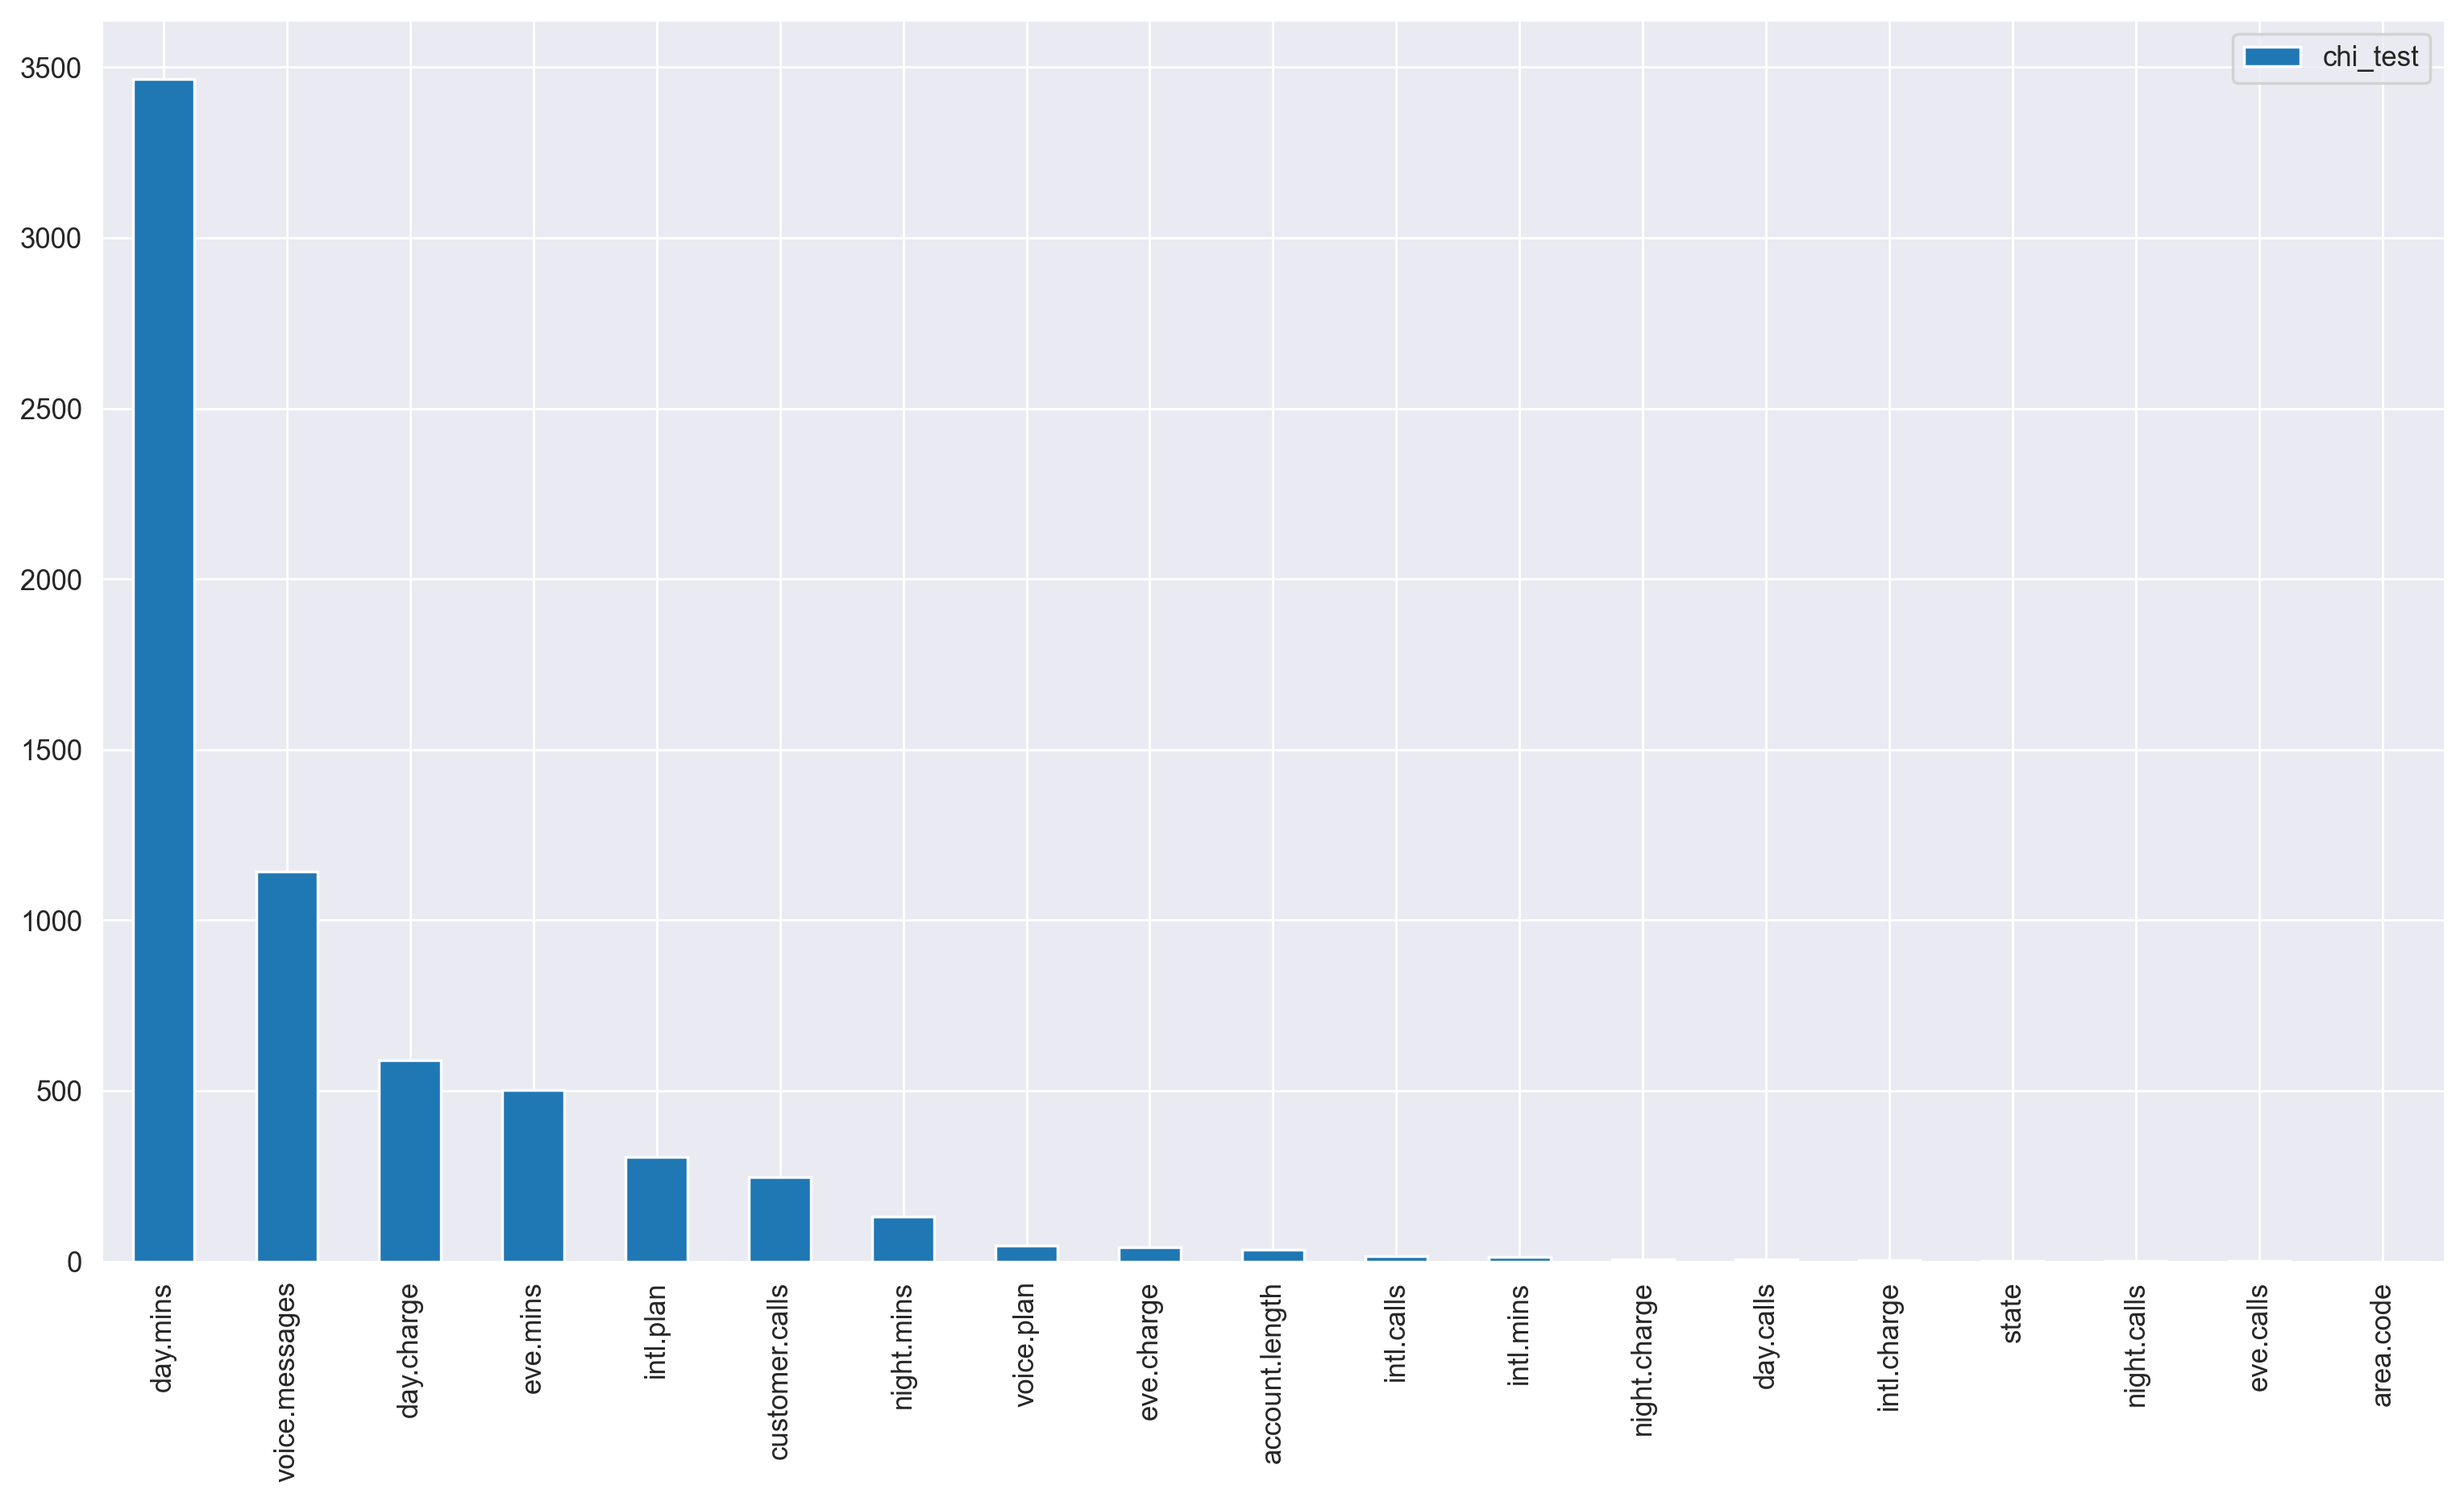

In [193]:
r.sort_values(by='chi_test', ascending=False).plot(kind='bar')

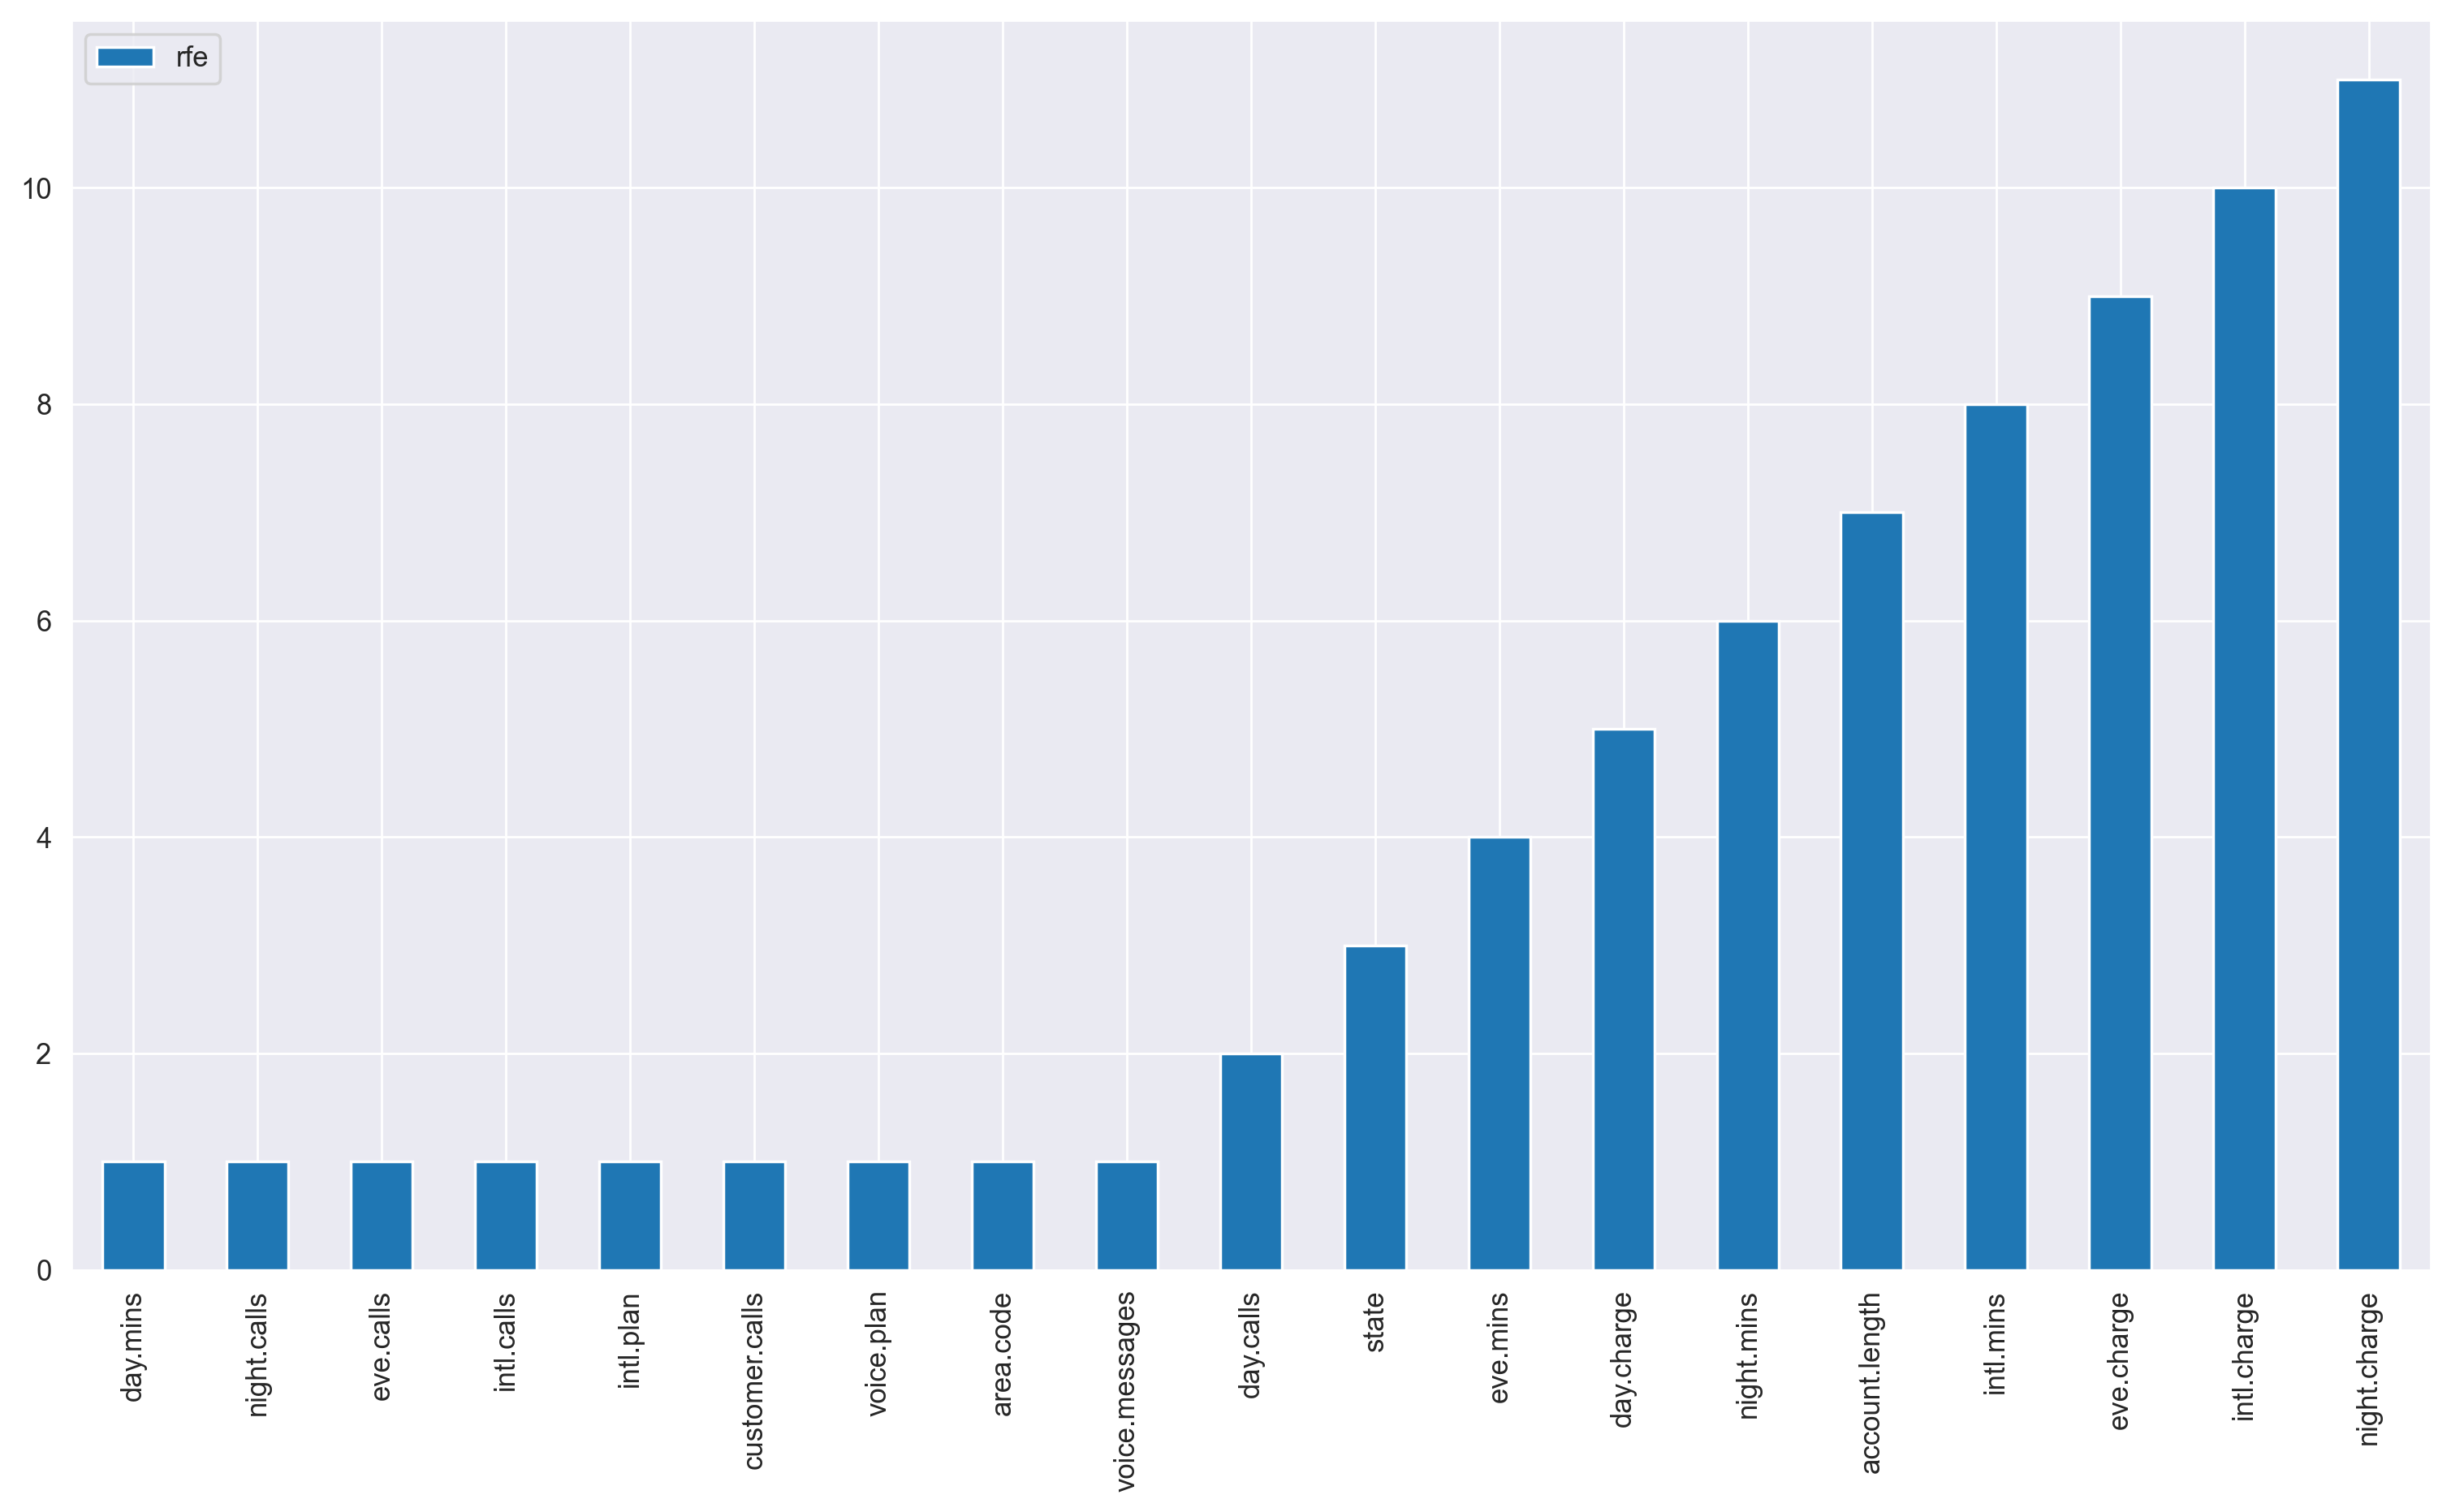

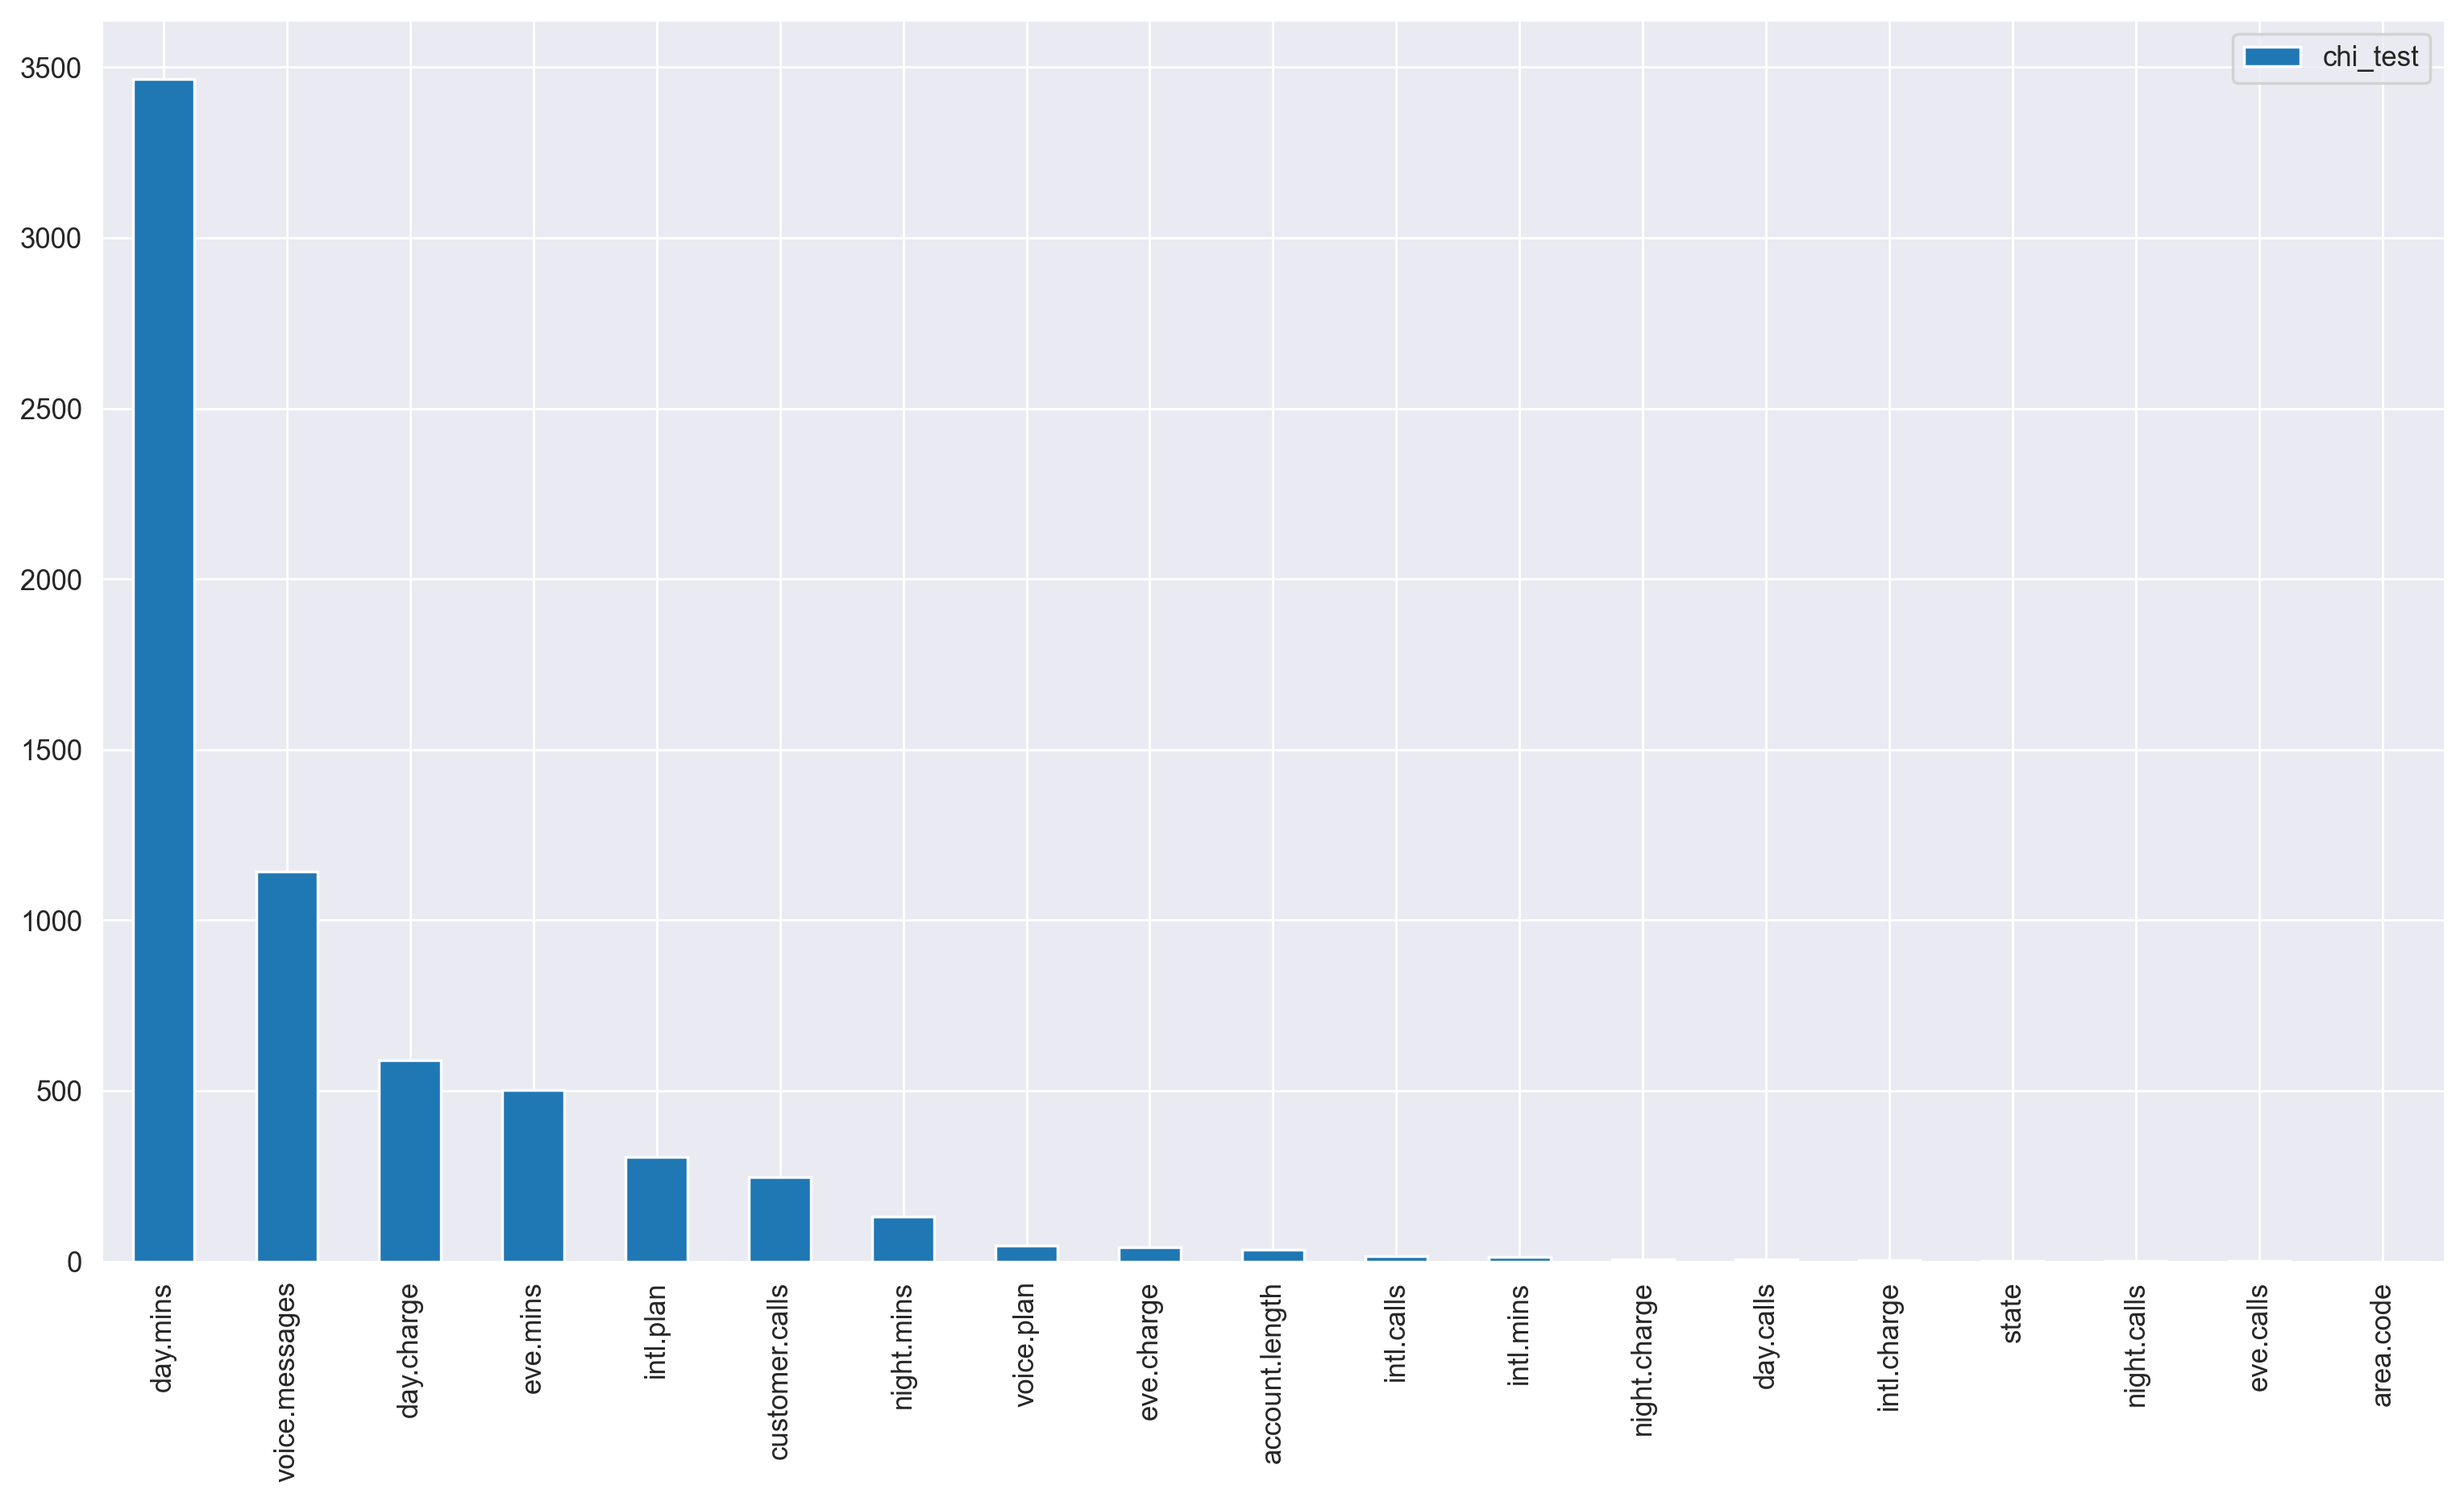

In [197]:
r2.sort_values(by='rfe').plot(kind='bar')

<Axes: xlabel='IG', ylabel='Features'>

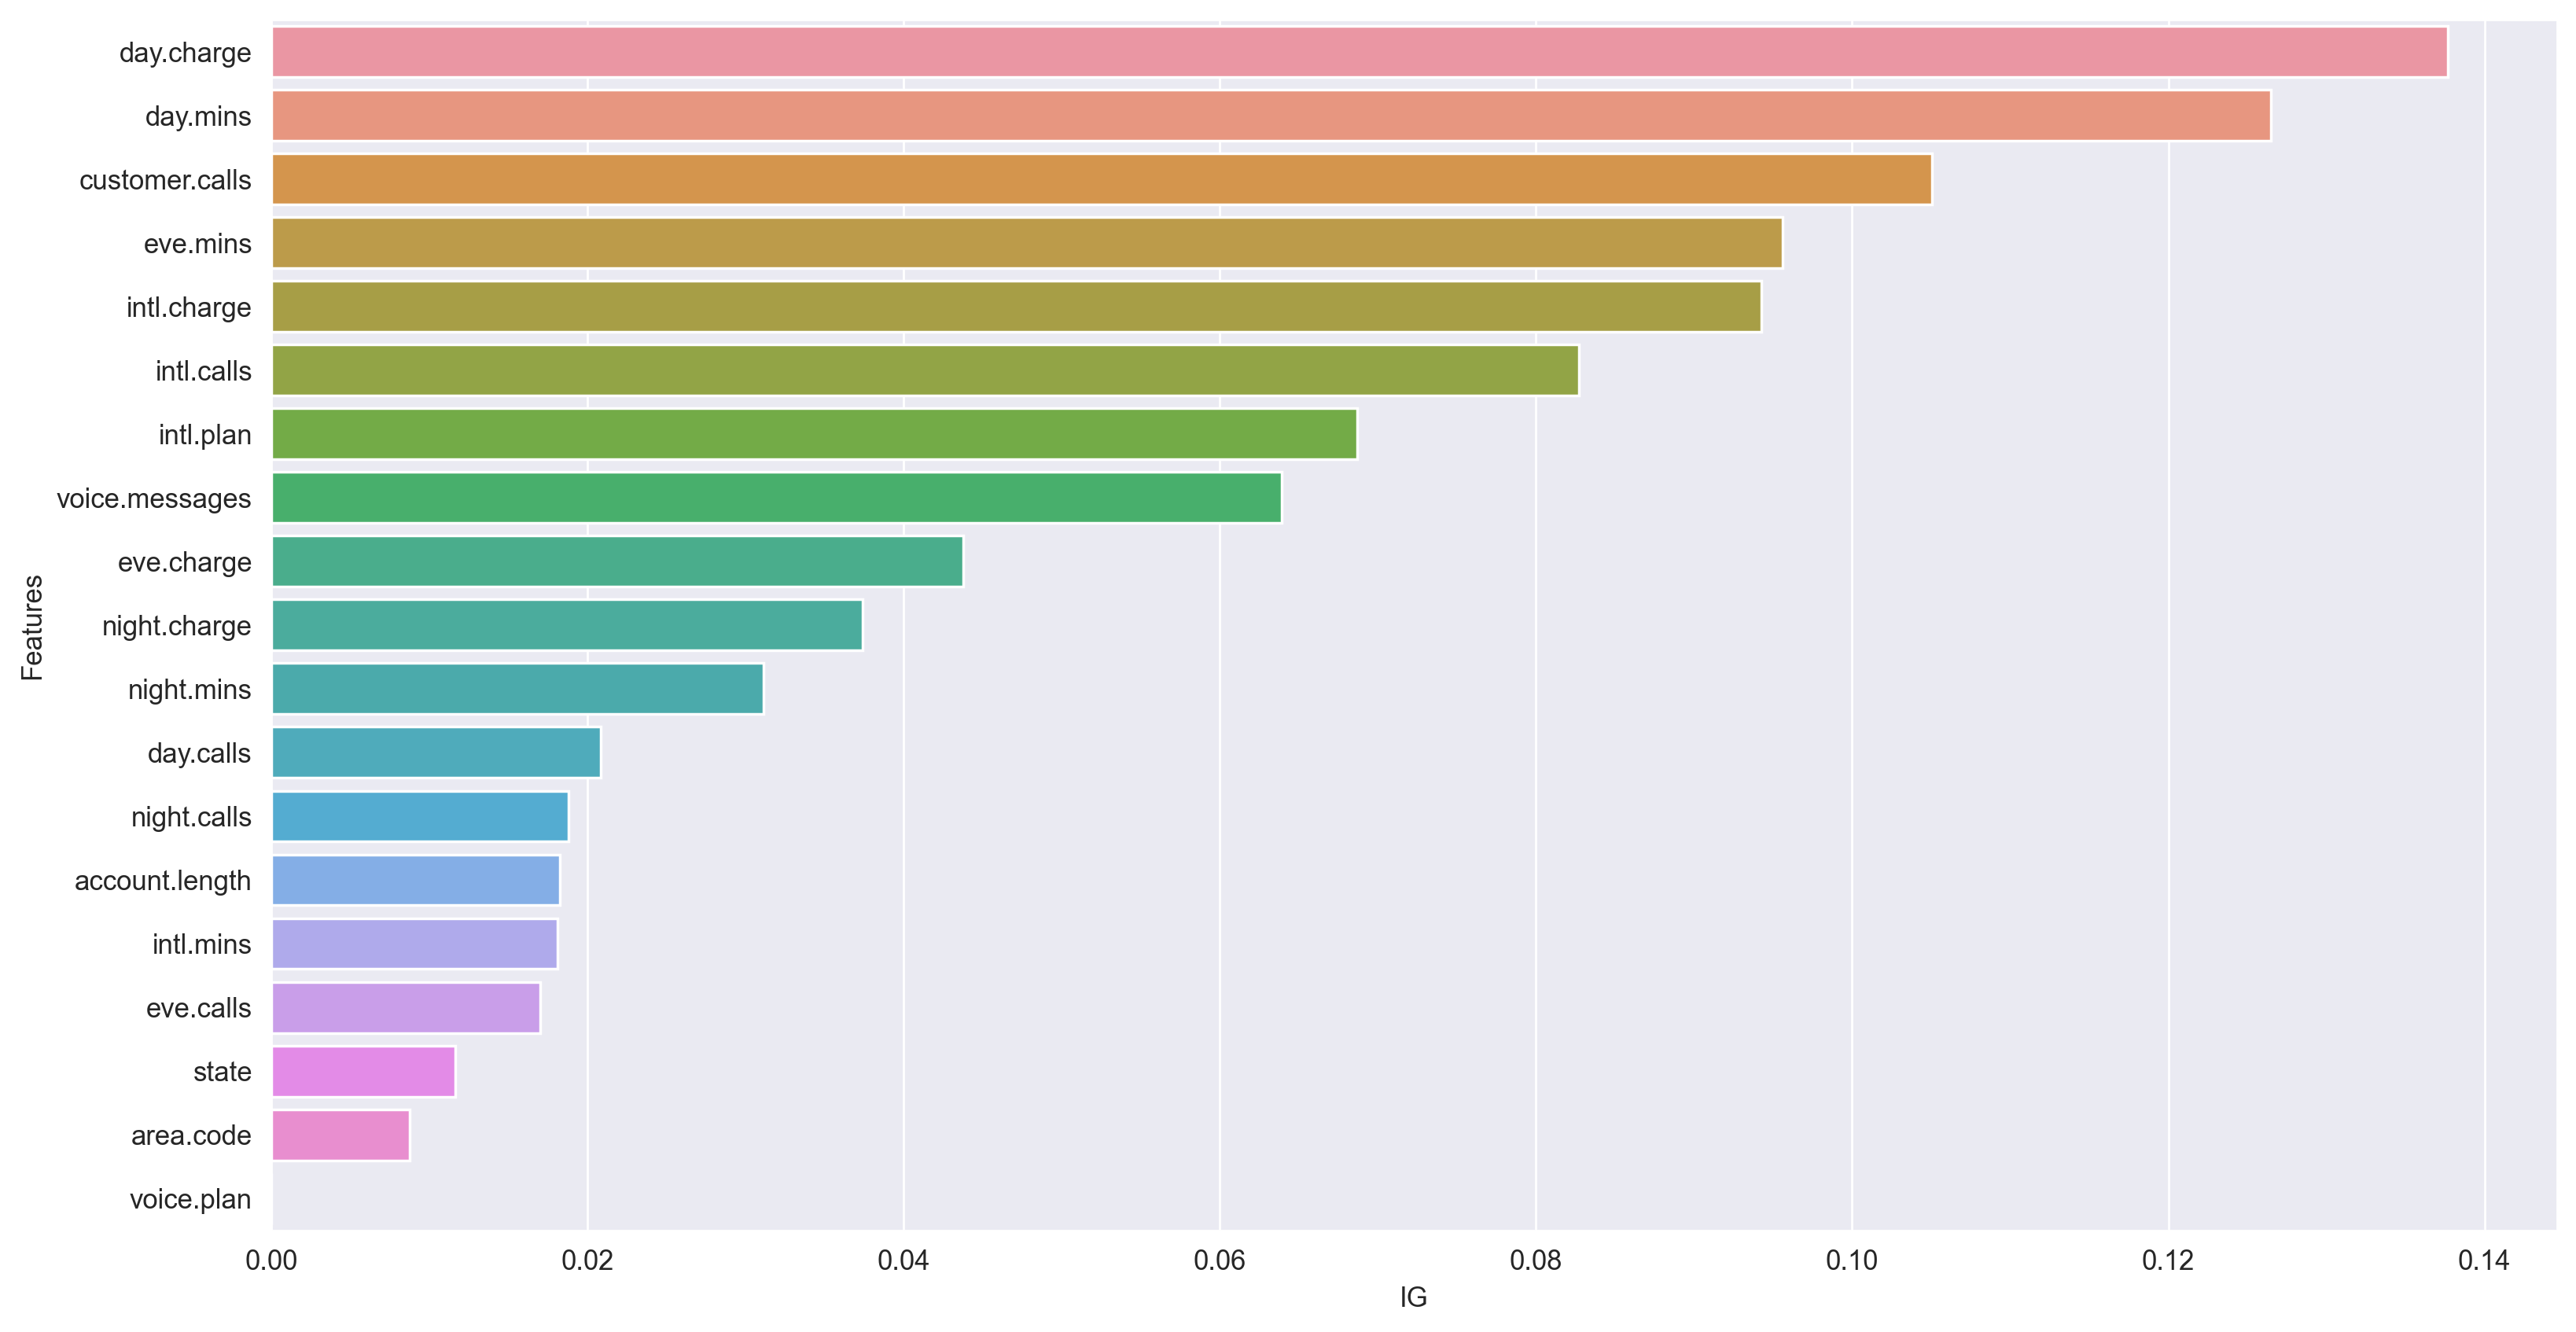

In [195]:
sns.barplot(x = imp_cols.sort_values(by='IG', ascending=False).loc[:,'IG'],
            y = imp_cols.sort_values(by='IG', ascending=False).loc[:,'Features'])

## Normalizing The Dataset

In [16]:
sc = StandardScaler()
scaled_x  = pd.DataFrame(sc.fit_transform(x), columns=x.columns)

In [17]:
scaled_x

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,-0.007642,0.304487,-0.102082,0.121182,1.205299,1.792614,-1.228665,1.362143,-1.365769
1,0.904826,0.976403,-0.214084,1.564619,-0.020694,-0.073156,0.813507,-0.010060,-1.240975
2,1.091758,0.633847,0.053781,0.675800,0.802999,-0.781799,1.306953,2.252717,0.874155
3,1.757796,-0.521747,-0.459298,-0.429411,-0.814127,-0.331765,-0.857768,-2.306225,0.129553
4,-1.255332,-0.271267,0.908644,0.299930,-0.241907,-1.842063,-1.851826,-0.777330,-1.908292
...,...,...,...,...,...,...,...,...,...
2788,-0.838313,-0.328724,0.577140,0.448008,0.416073,-0.107977,-0.697469,-0.410309,-0.415574
2789,0.655515,-0.089276,-0.541756,0.677283,-0.020694,-0.408100,1.768553,0.003440,-1.587514
2790,2.038902,-0.707176,1.468398,0.157728,-0.020694,0.098930,-1.021174,0.218429,-0.914270
2791,-1.648126,1.197558,-1.220784,-0.607126,-0.020694,-0.274495,-0.980299,0.728251,0.981587


### Splitting The Data Into Training And Testing Set

In [18]:
xtrain,xtest,ytrain,ytest = train_test_split(scaled_x,y,train_size=0.75,random_state=1)

In [19]:
xtrain

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
880,1.053356,0.281386,0.330439,0.960059,-0.027029,0.977890,0.274949,0.296965,1.561929
2181,-0.007642,1.891116,0.373868,0.111971,0.395654,0.022852,-0.094297,-0.427665,2.774111
1404,-0.007642,0.608802,0.847430,-2.558752,-0.020694,0.761647,0.458904,0.816479,0.448556
133,-0.007642,1.790008,-0.259815,1.194777,-0.020694,0.186275,0.736721,-0.108191,-0.270303
2729,0.392890,-0.326838,1.321641,0.370731,-0.612173,0.630183,-0.703288,-1.553615,0.439443
...,...,...,...,...,...,...,...,...,...
2763,1.838730,-0.937894,0.693604,0.225124,-0.020694,0.951644,-1.270315,-1.078621,-0.705847
905,1.288771,-0.634809,0.222850,0.378254,0.662247,-0.140827,-0.606274,2.617992,-0.636673
1096,1.083767,1.174547,-0.399135,-0.174761,0.166447,0.519665,-1.501741,1.166190,0.870065
235,0.500654,-1.366003,0.590509,0.879112,-2.106664,0.917475,-0.204506,-0.064443,0.273421


## Exporting Dataframe

In [20]:
#xtrain.to_csv('xtrain.csv', index=False)
#xtest.to_csv('xtest.csv', index=False)
#ytrain.to_csv('ytrain.csv', index=False)
#ytest.to_csv('ytest.csv', index=False)